In [2]:
%load_ext rpy2.ipython
import warnings
warnings.filterwarnings('ignore')

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


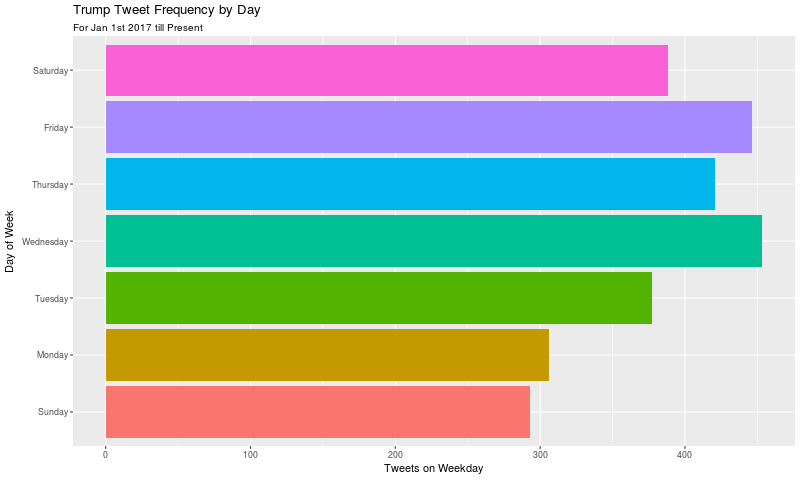

In [120]:
%%R -w 800

library(readr)
library(dplyr)

trump_df <- read_csv("./data/realdonaldtrump.csv")
colnames(trump_df)
trump_df$created_at <- gsub(" +0000", "", trump_df$created_at, fixed=T)
trump_df$created_at <- as.POSIXlt(trump_df$created_at, "EST",  format="%a %b %d %H:%M:%S %Y")

trump_df$created_at_day <- as.integer(trump_df$created_at$wday)
tweet_day <- data.frame(t(table(trump_df$created_at_day))) %>%
    select(Var2, Freq) %>%
    mutate(day=factor(Var2, levels=0:6, labels = c("Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday")))
    
library(ggplot2)

ggplot(tweet_day, aes(x=day, y=Freq, fill=day)) + geom_bar(stat="identity") + theme(legend.position="") +
    coord_flip() + labs(title="Trump Tweet Frequency by Day", subtitle="For Jan 1st 2017 till Present", x="Day of Week", y="Tweets on Weekday")